# Getting the packages and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

No Null Values present in the data

In [3]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Corelation

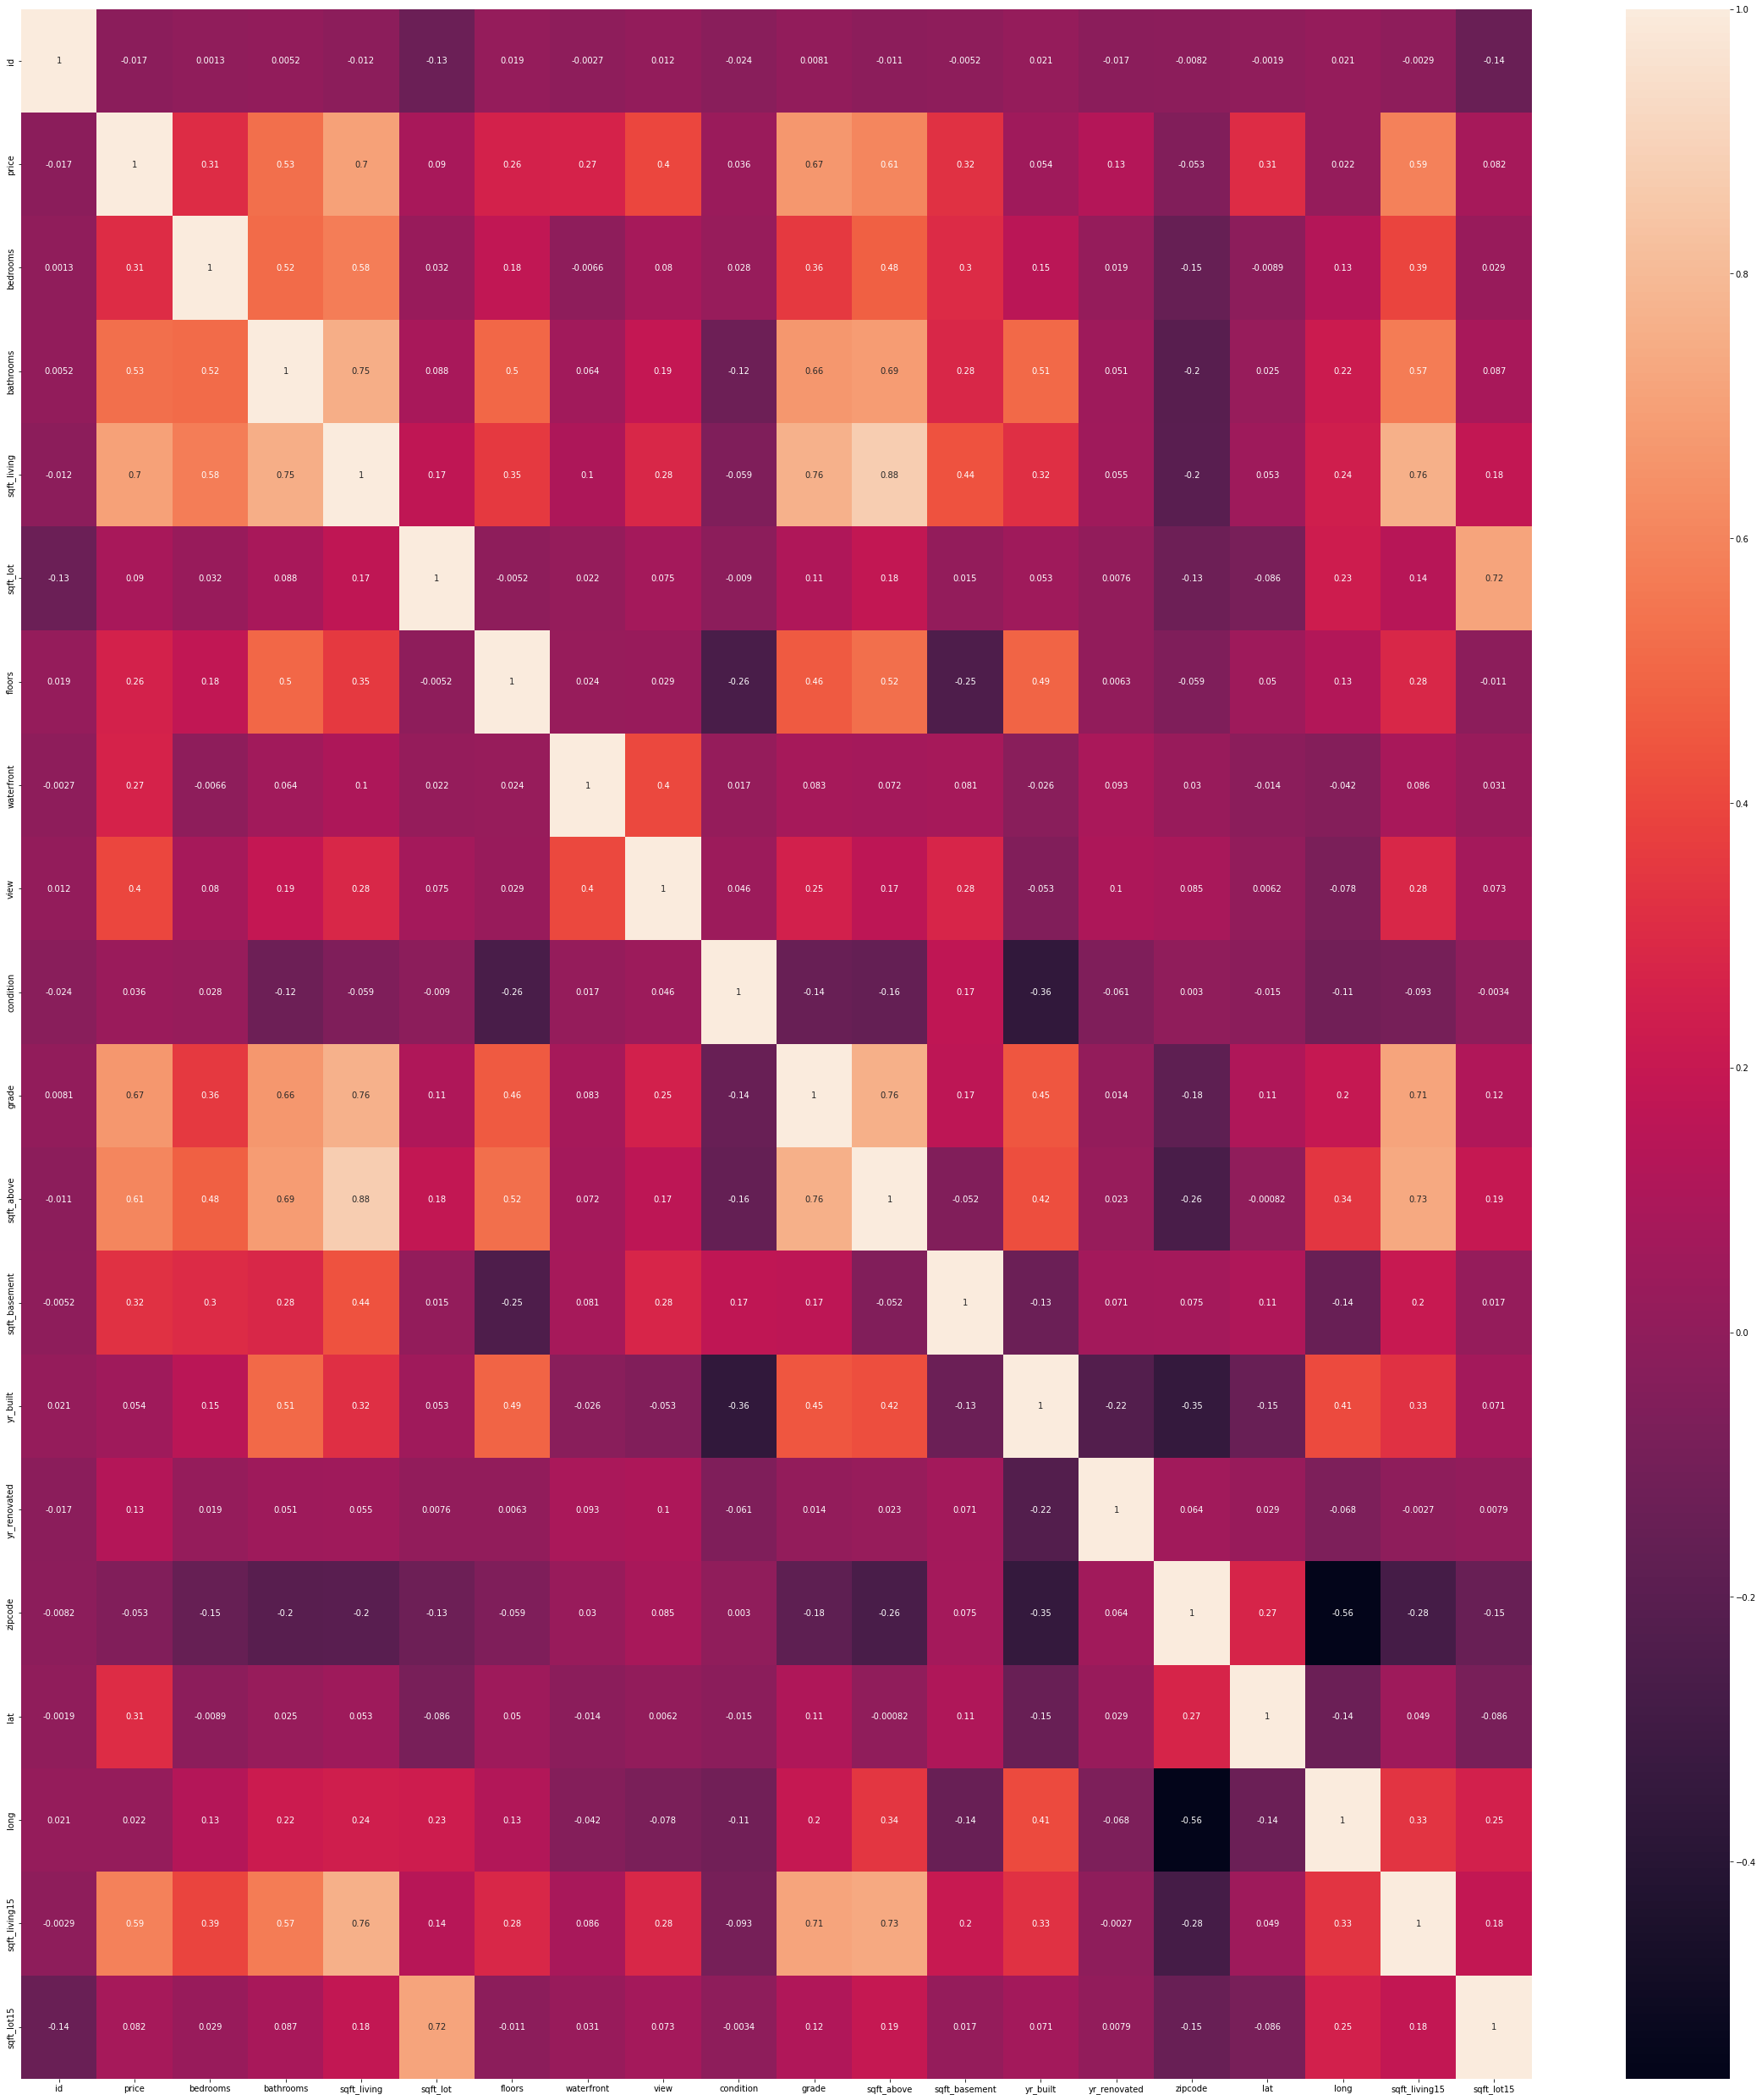

In [4]:
fig = plt.figure(figsize = (40,45))
sns.heatmap(data.corr(),annot=True)
plt.show()

Strong Positive Correlation in dependent and Independent Variables

In [5]:
indexes = data.corr().loc[data.corr()["price"] > 0.5].index
len(indexes)

6

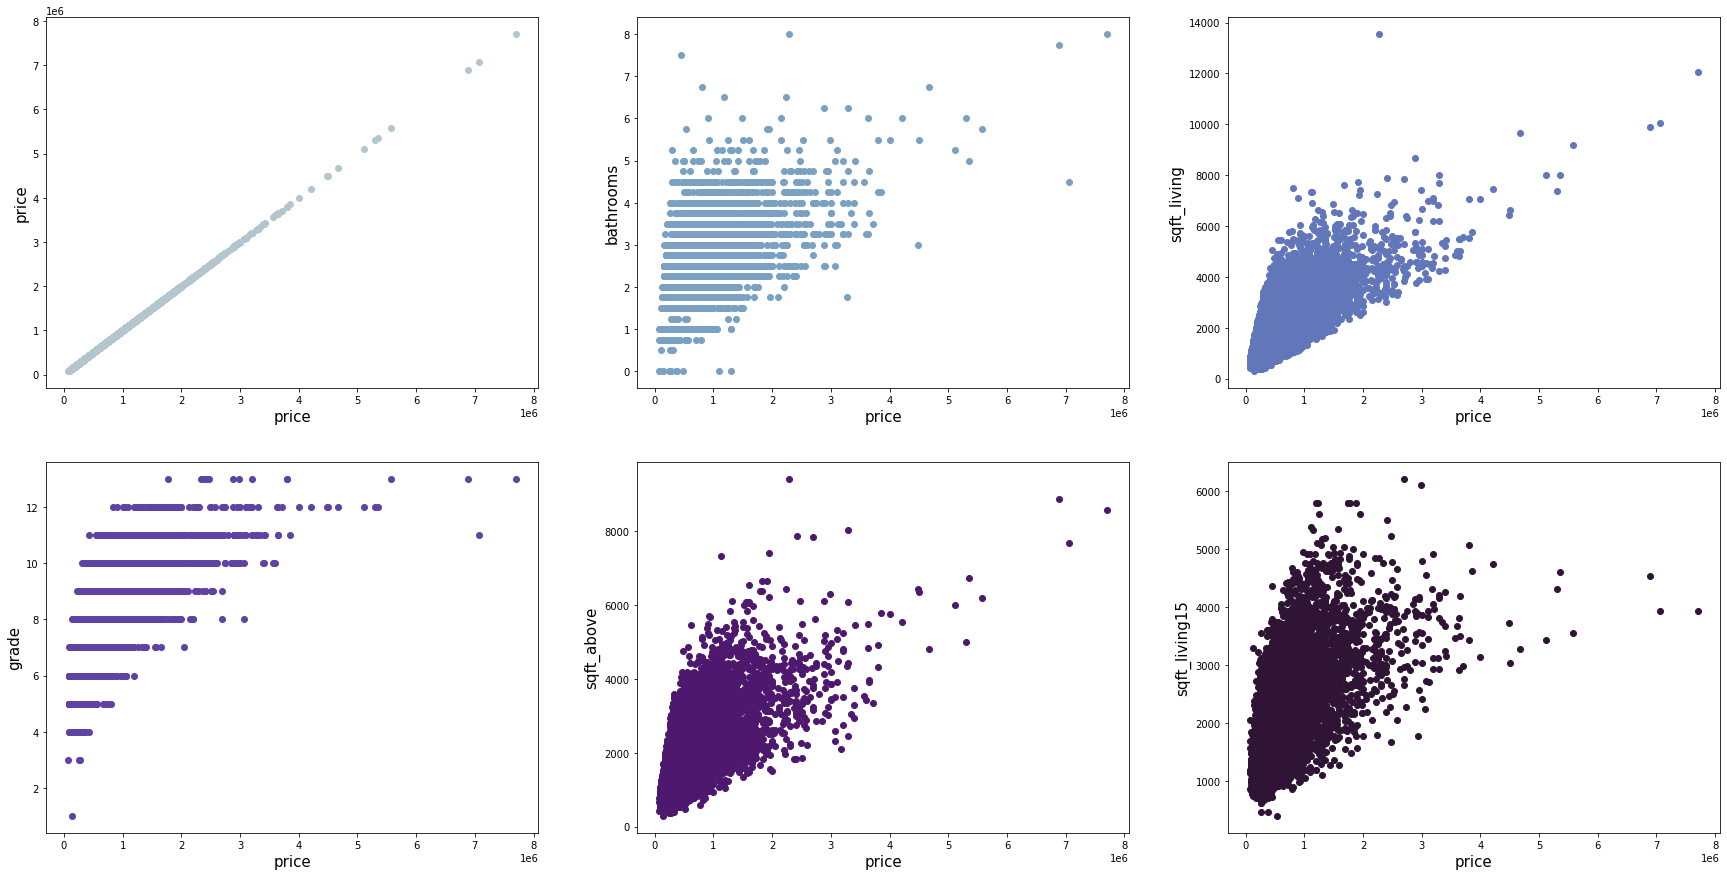

In [6]:
indexes = data.corr().loc[data.corr()["price"] > 0.5].index
color = sns.color_palette("twilight",11)
fig = plt.subplots(2,3,figsize = (30,15))
for i,index in enumerate(indexes):
    plt.subplot(2,3,i+1)
    plt.scatter(x = data["price"],y = data[index],color = color[i])
    plt.ylabel(index,fontsize = 15)
    plt.xlabel("price",fontsize = 15)

In [7]:
indexes = data.corr().loc[data.corr()["price"] < 0.5].index
len(indexes)

14

corelation in other varaibles and target

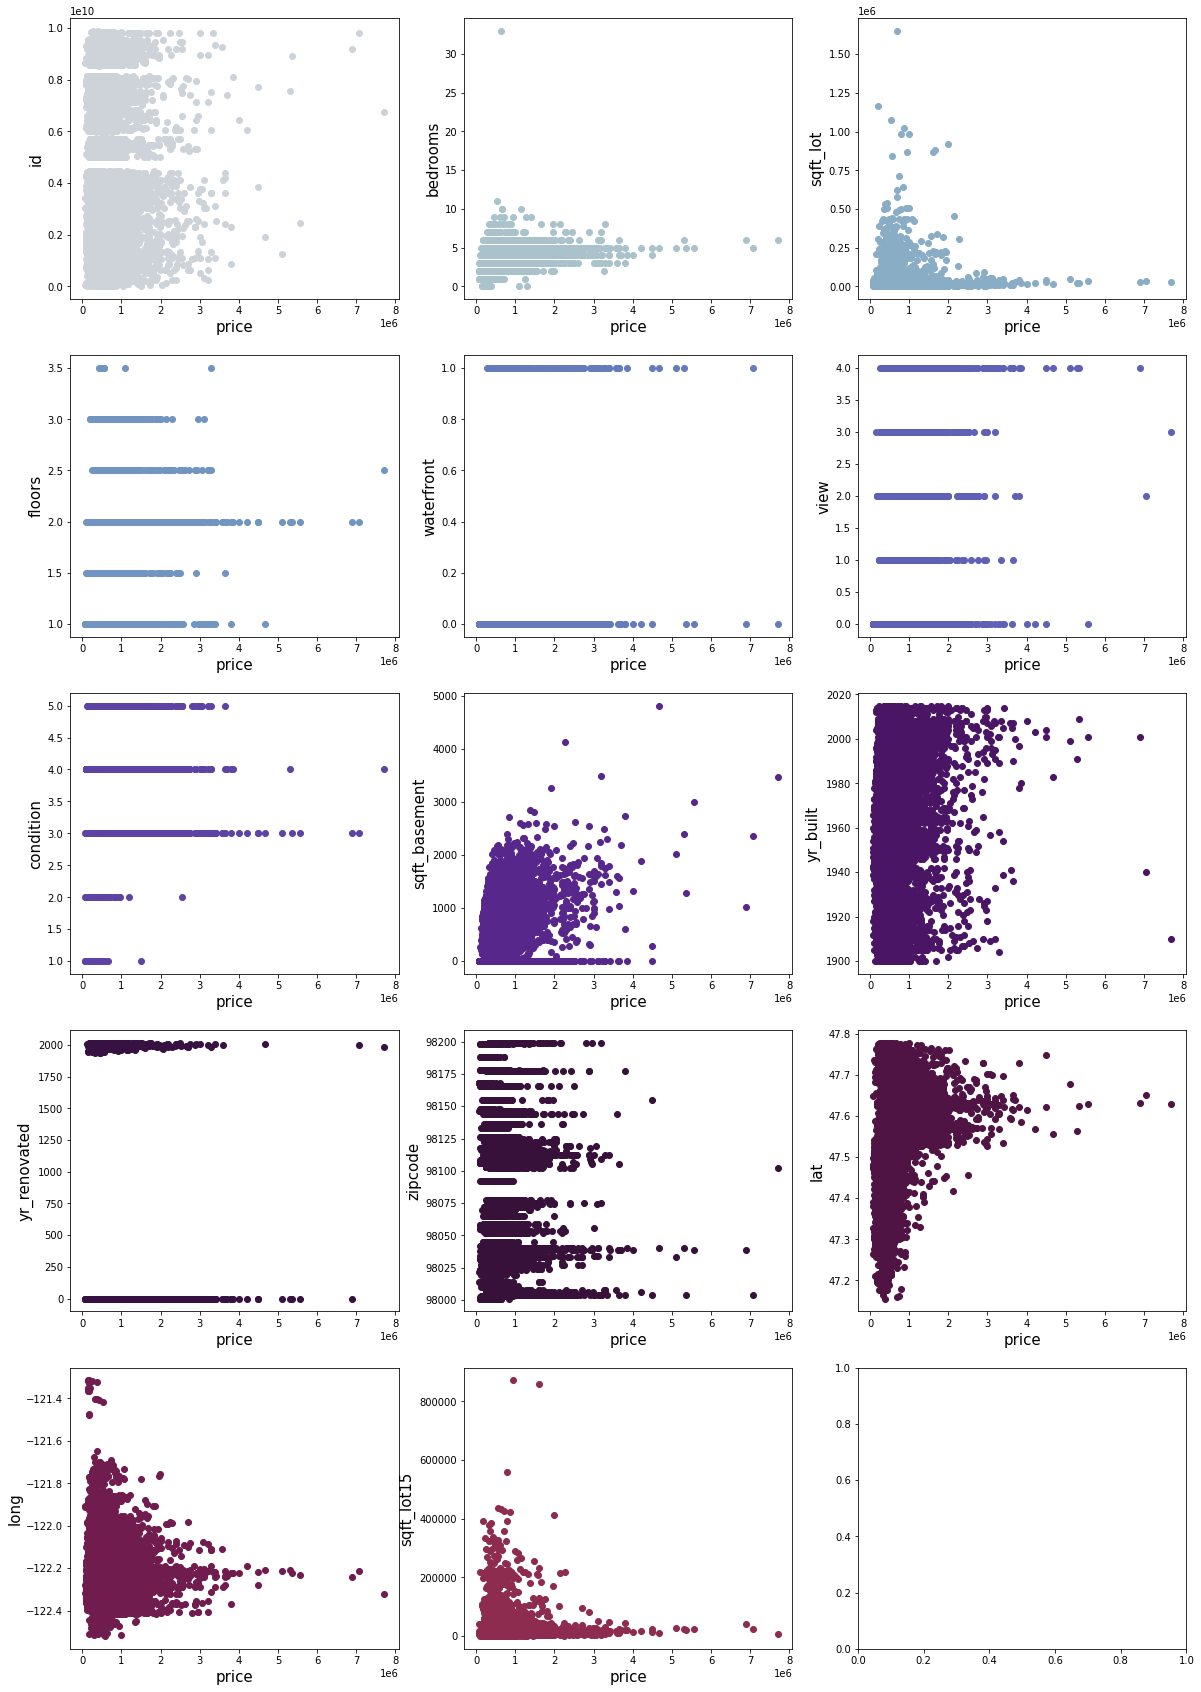

In [8]:
indexes = data.corr().loc[data.corr()["price"] < 0.5].index
color = sns.color_palette("twilight",20)
fig = plt.subplots(5,3,figsize = (20,30))
for i,index in enumerate(indexes):
    plt.subplot(5,3,i+1)
    plt.scatter(x = data["price"],y = data[index],color = color[i])
    plt.ylabel(index,fontsize = 15)
    plt.xlabel("price",fontsize = 15)

# Converting the Date column to integer

In [9]:
data[["conDate","conDate0"]] = data["date"].str.split("T",expand=True)
data["conDate"] = data["conDate"].astype("float64")
plotdata=data.drop(["id","date","conDate0","conDate"],axis=1)

Features distibuted Normally

In [10]:
for col in plotdata.columns:
    if plotdata[col].dtype not in ("float64","int64"):
        print("Cant check skewness :",col)
    elif plotdata[col].skew() > -1 and plotdata[col].skew() < 1:
        print("Close to Normal Distribution : " ,col)

Close to Normal Distribution :  bathrooms
Close to Normal Distribution :  floors
Close to Normal Distribution :  grade
Close to Normal Distribution :  yr_built
Close to Normal Distribution :  zipcode
Close to Normal Distribution :  lat
Close to Normal Distribution :  long


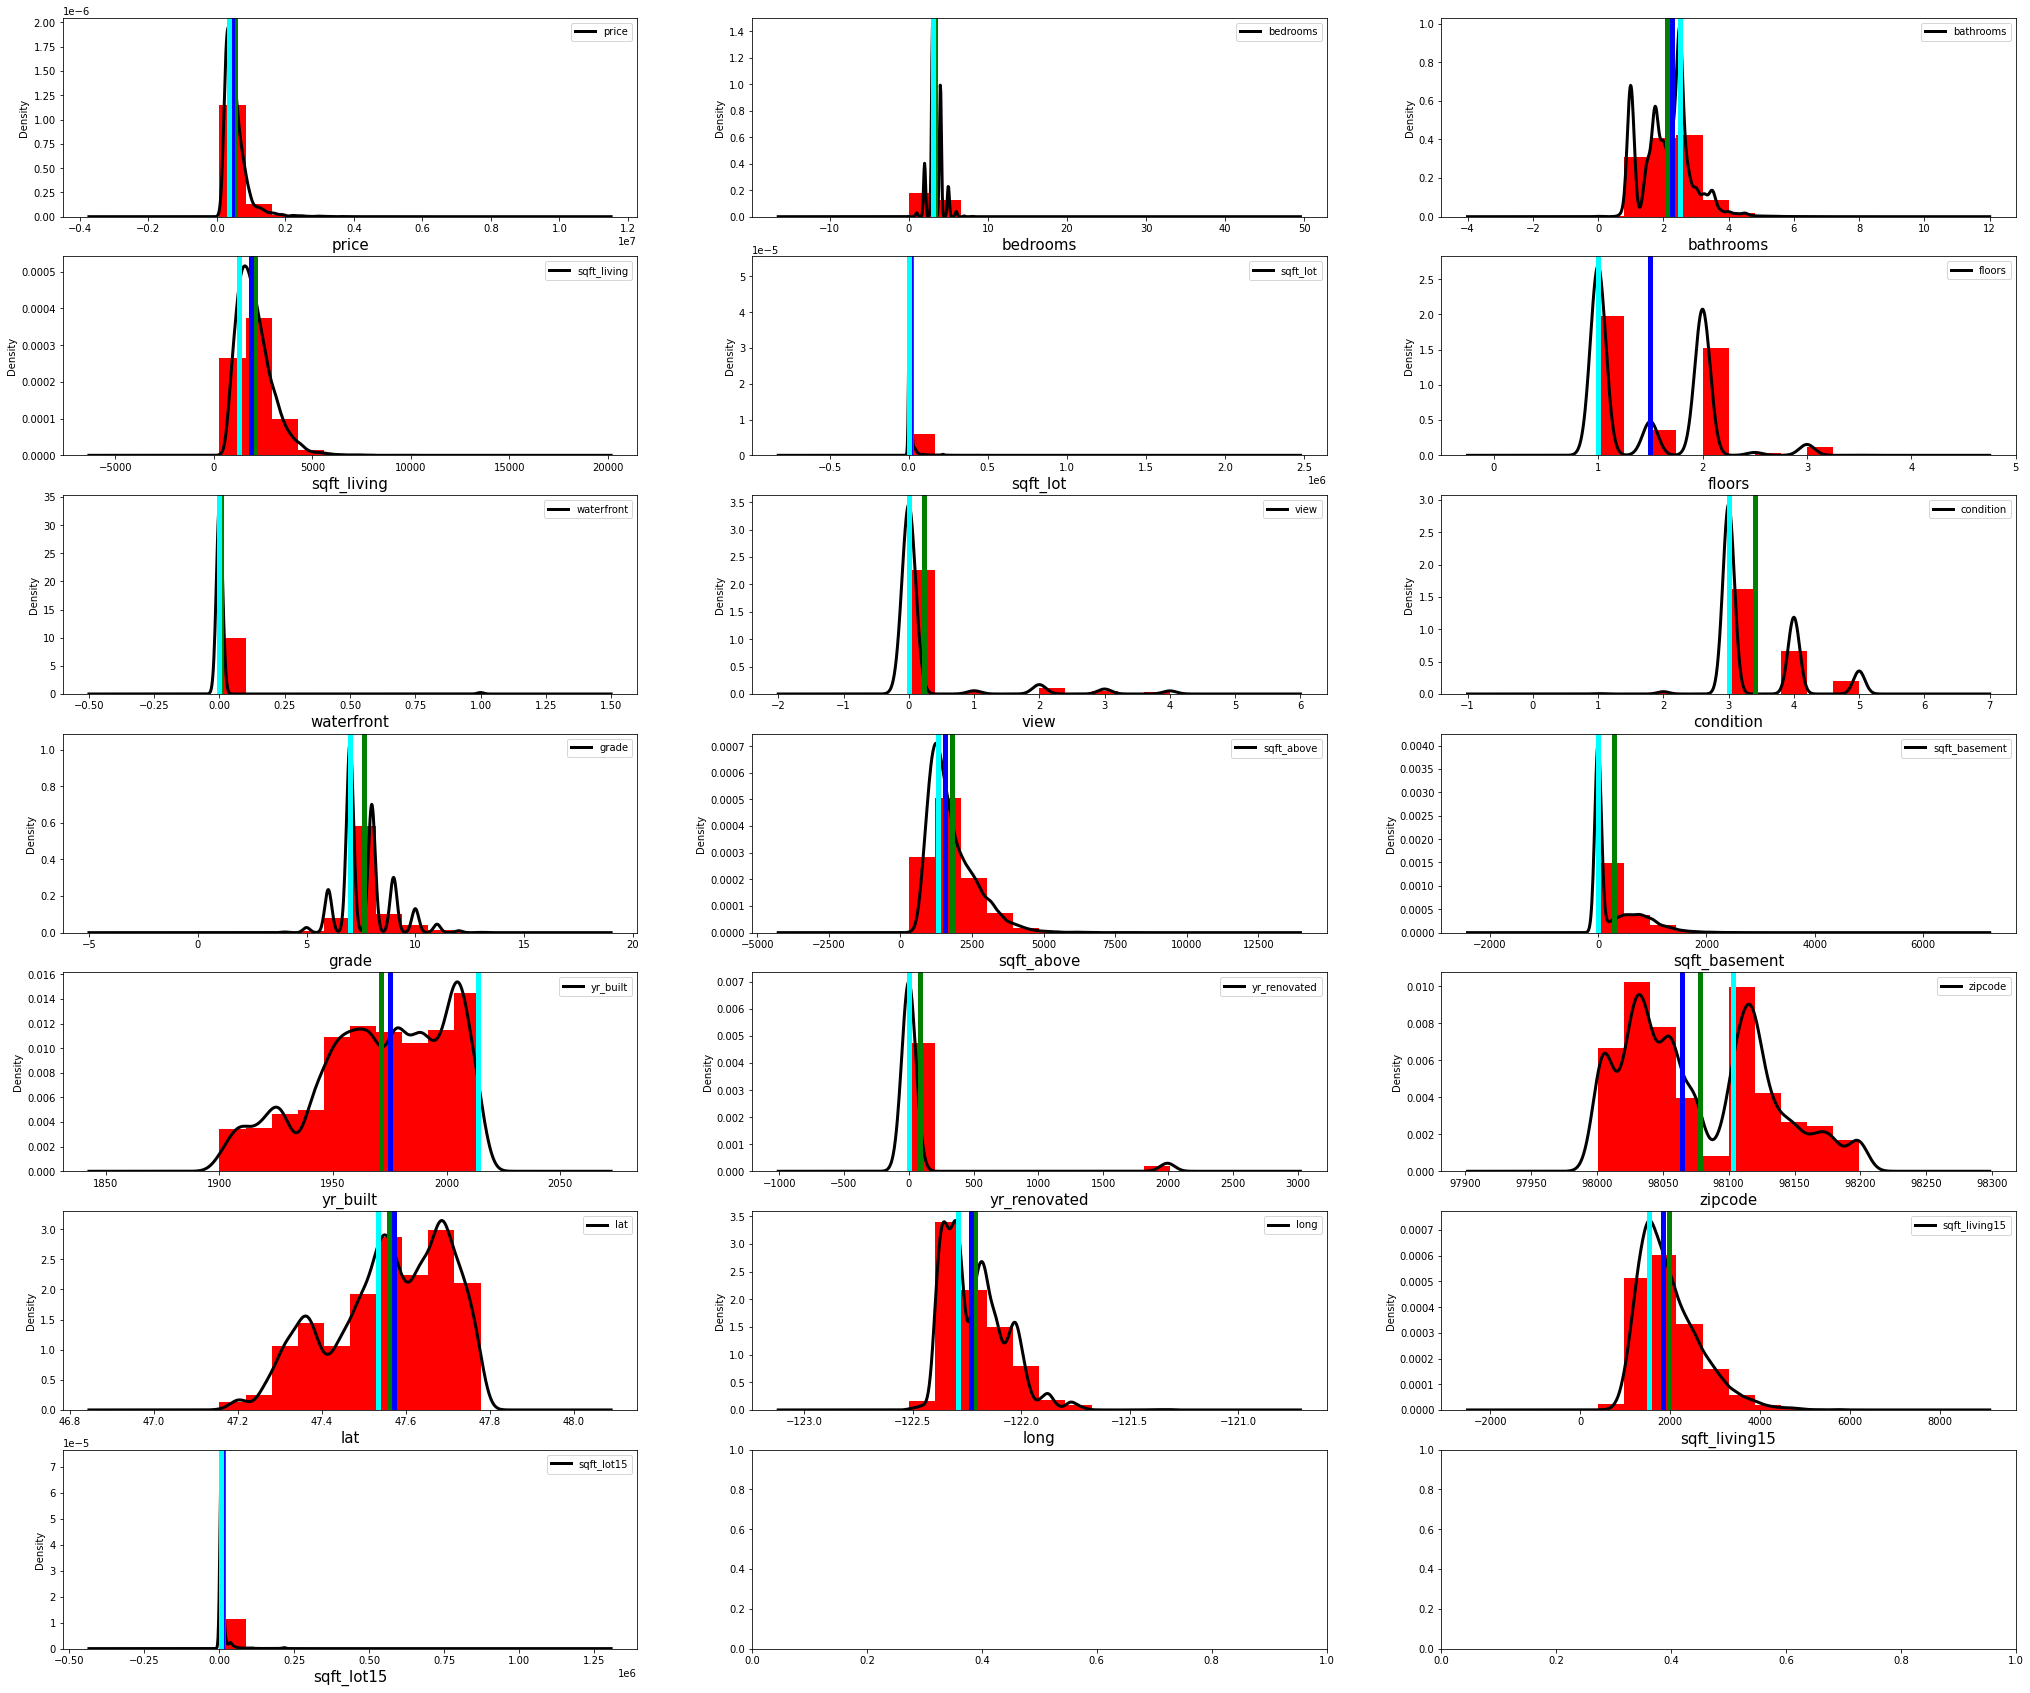

In [11]:
fig = plt.subplots(7,3,figsize = (35,30))
for i,col in enumerate(plotdata.columns):
    plt.subplot(7,3,i+1)
    hist = plotdata[col].value_counts(normalize=True).sort_index()
    plt.hist(plotdata[col],density=True,color ="red")
    plotdata[col].plot.kde(linewidth = 3, color = "black")
    plt.axvline(plotdata[col].mean(),color = "green",linewidth = 5)
    plt.axvline(plotdata[col].median(),color = "blue",linewidth = 5)
    plt.axvline(plotdata[col].mode()[0],color = "cyan",linewidth = 5)
    plt.xlabel(col,fontsize = 15)
    plt.legend()

Outliers are present in almost all the features we will not deal with outliers because a outlier in sqft_living might have a relation with a outlier in price(dependent) feature, if dropping these outliers we might not be able to establish relations between expensive or cheap houses and will be left with prices of house near to mean.

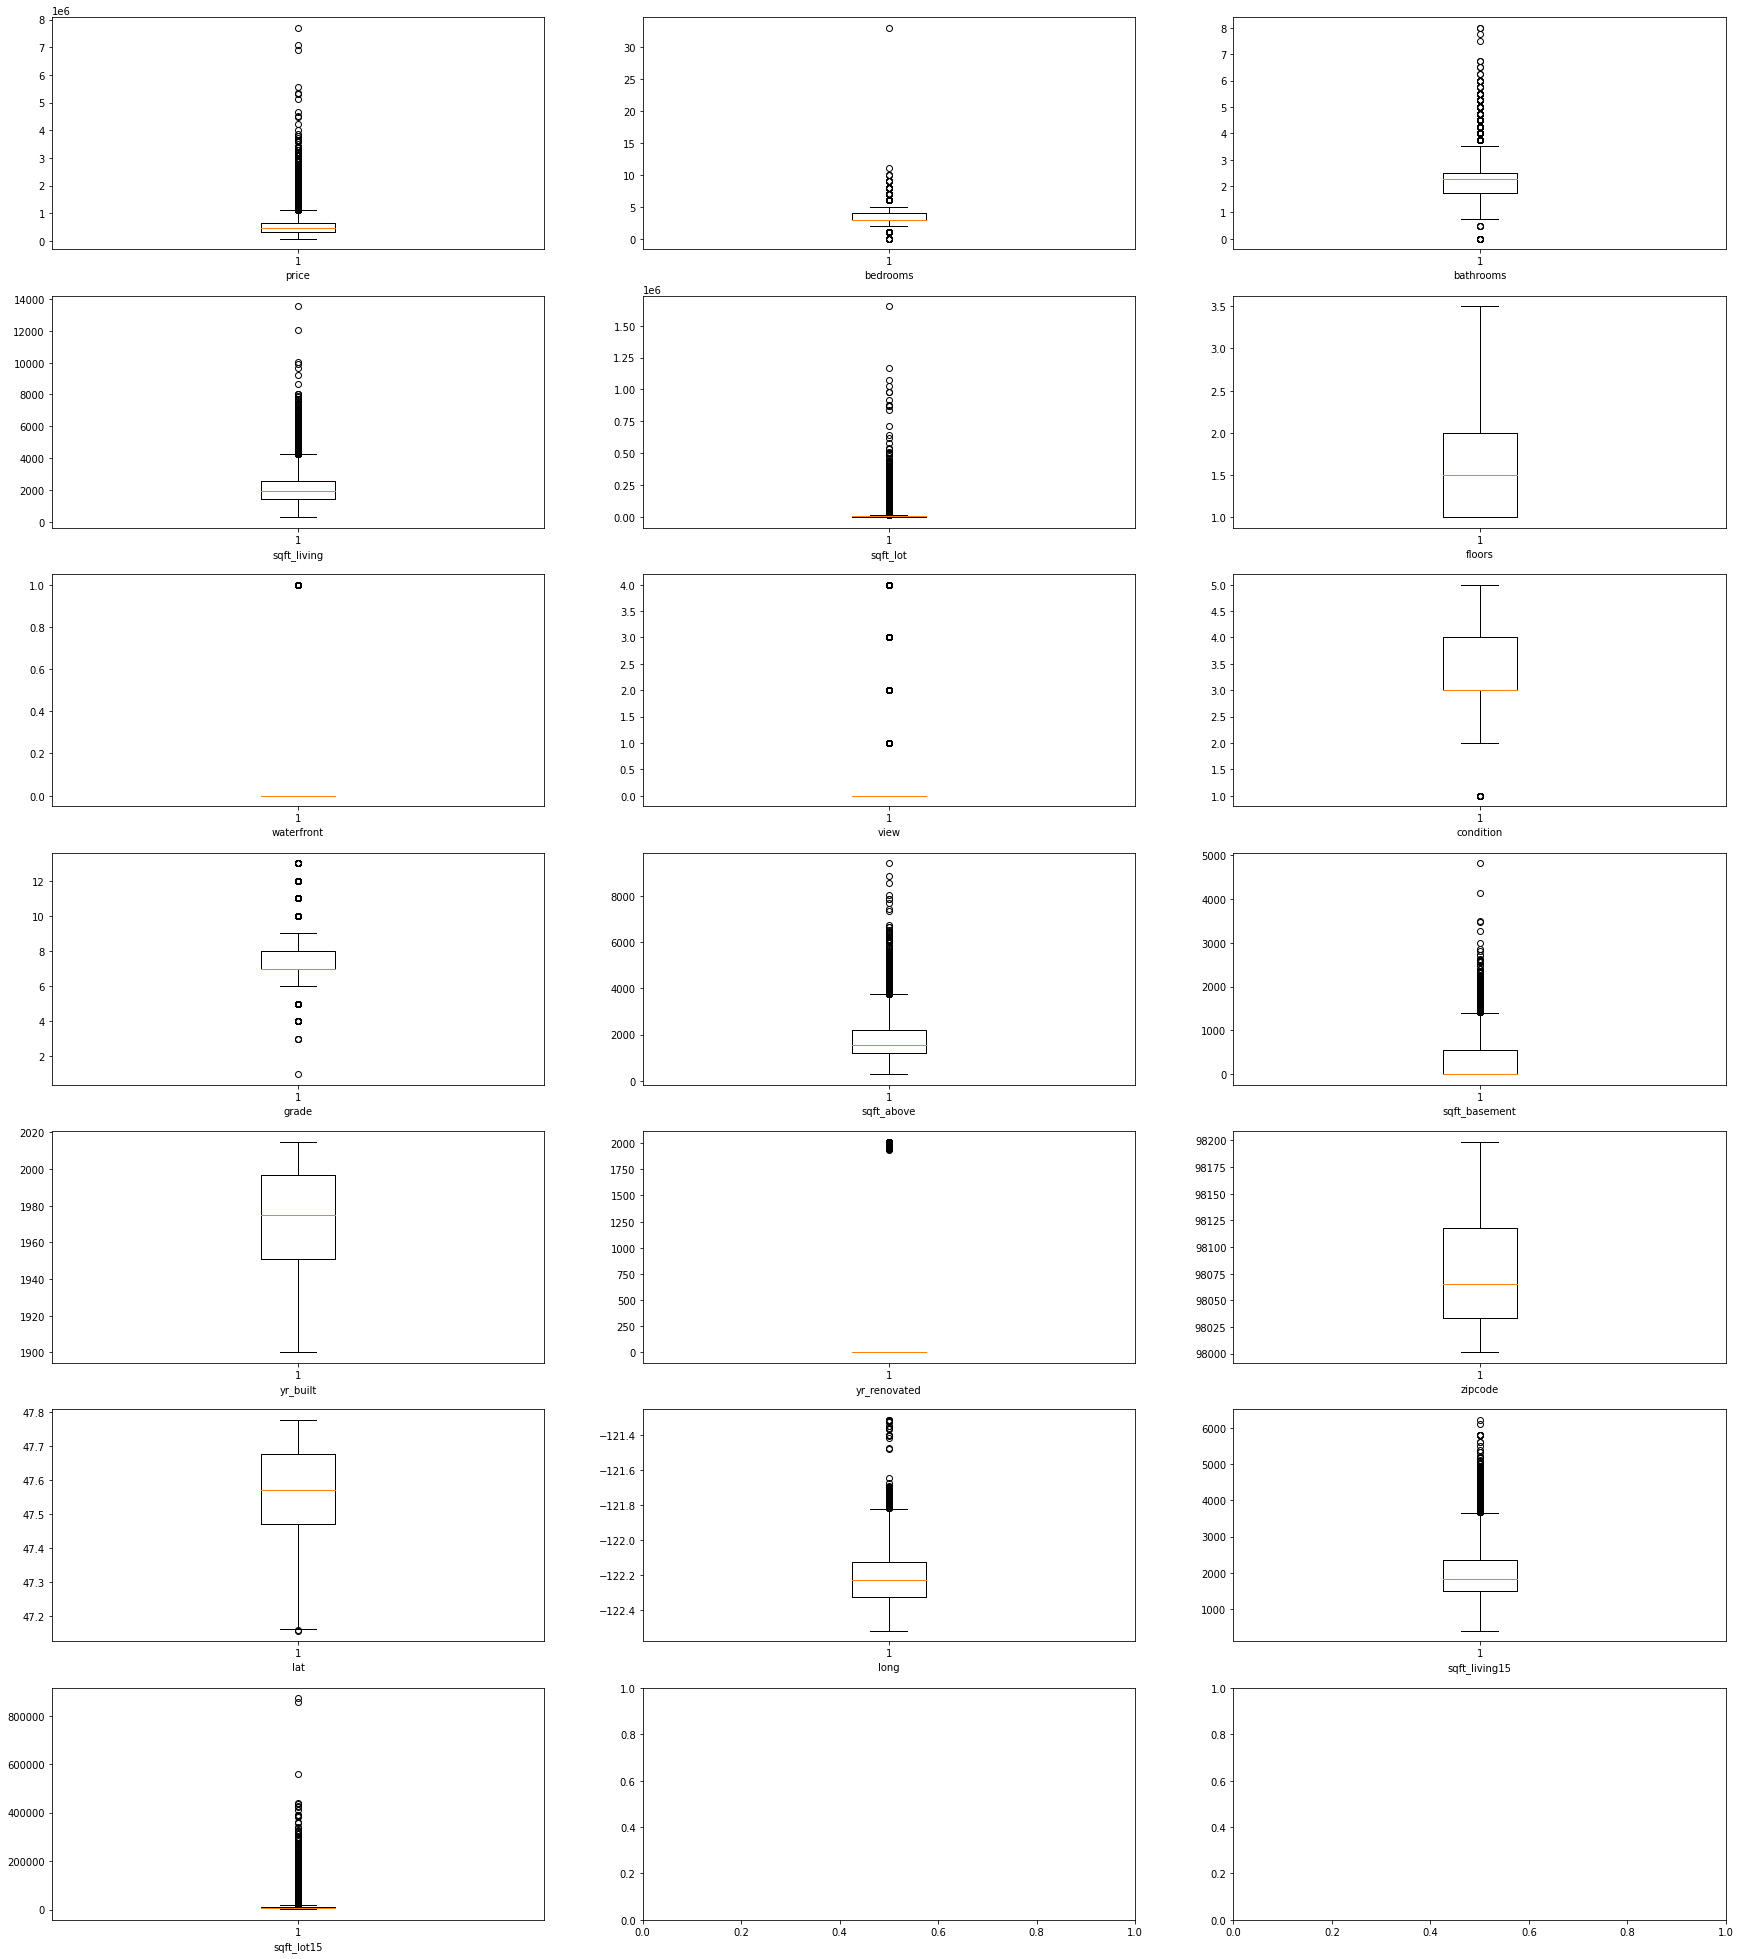

In [12]:
fig = plt.subplots(7,3,figsize = (30,35))
for i,index in enumerate(plotdata.columns): 
    plt.subplot(7,3,i+1)
    plt.boxplot(plotdata[index])
    plt.xlabel(index)


creating a single Column of Total sqft for all sqft with strong positive correlation with target

In [13]:
for index in data.corr().loc[data.corr()["price"] > 0.5].index:
    if "sqft" in index:
        print(index)


sqft_living
sqft_above
sqft_living15


In [14]:
data["totalsqft"] = data["sqft_living"]+data["sqft_above"]+data["sqft_basement"]

Text(0, 0.5, 'TotalSqft')

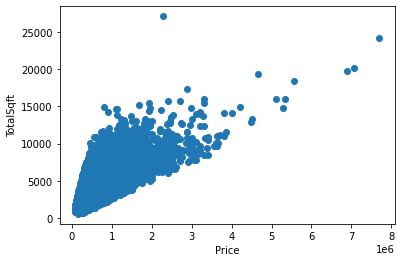

In [15]:
plt.scatter(data["price"],data["totalsqft"])
plt.xlabel("Price")
plt.ylabel("TotalSqft")

# Model one

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [17]:
#Creating X and Y for model
X = np.array(data[['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade',
     'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15', 'conDate','totalsqft']])
Y = np.array(data["price"]).reshape(-1,1)

#Splitting the data
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33,random_state=40)
model = LinearRegression()

#transforming the data 
MS = MinMaxScaler()
X_train = MS.fit_transform(Xtrain)
X_test = MS.transform(Xtest)
Y_train = MS.fit_transform(Ytrain)
Y_test = MS.transform(Ytest)

#Model Fitting
model.fit(X_train,Y_train)

#Predicting
pred = model.predict(X_test)

#Scaling up predictions
pred = MS.inverse_transform(model.predict(X_test))

#Calculating the parameters for Model evaluation
r21 = r2_score(Ytest,pred)
rmse = mean_squared_error(Ytest,pred)
mape = mean_absolute_percentage_error(Ytest,pred)
print("Rsquared Value : ",r21)
print("Root Mean Sqaured Error : ",rmse)
print("Mean Absolute percentage error: ",mape)

Rsquared Value :  0.7044375652367174
Root Mean Sqaured Error :  38100272520.275
Mean Absolute percentage error:  0.25476979713983694


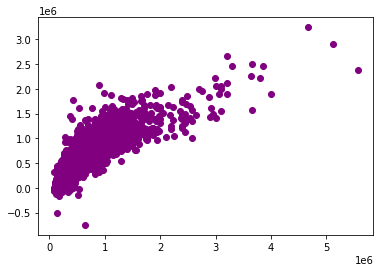

In [18]:
plt.scatter(Ytest,pred,color="purple")
plt.show()


# Model Two

In [19]:
indexes = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
X2 = np.array(data[indexes])
Y2 = np.array(data["price"]).reshape(-1,1)

In [20]:
Xtrain2,Xtest2,Ytrain2,Ytest2 = train_test_split(X2,Y2,test_size=0.33,random_state=40)
model2 = LinearRegression()

In [21]:
MS = MinMaxScaler()
X_train2 = MS.fit_transform(Xtrain2)
X_test2 = MS.transform(Xtest2)
Y_train2 = MS.fit_transform(Ytrain2)
Y_test2 = MS.transform(Ytest2)

In [22]:
model2.fit(X_train2,Y_train2)
model2.score(X_train2,Y_train2)

0.539516519908884

In [23]:
pred2 = MS.inverse_transform(model2.predict(X_test2))
r22 = r2_score(Ytest2,pred2)
rmse2 = mean_squared_error(Ytest2,pred2)
mape2 = mean_absolute_percentage_error(Ytest2,pred2)
print("Rsquared Value : ",r22)
print("Root Mean Sqaured Error : ",rmse2)
print("Mean Absolute percentage error: ",mape2)

Rsquared Value :  0.5541680236054138
Root Mean Sqaured Error :  57471172926.596634
Mean Absolute percentage error:  0.32808558746689914


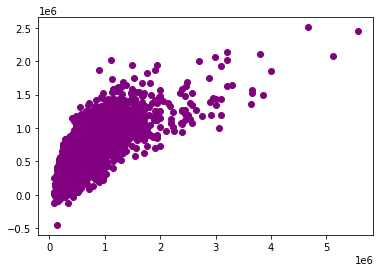

In [24]:
plt.scatter(Ytest2,pred2,color='purple')
plt.show()

# Model Three

In [25]:
indexes = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade',
     'yr_built','yr_renovated','zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15','totalsqft']
X3 = np.array(data[indexes])
Y3 = np.array(data["price"]).reshape(-1,1)

Xtrain3,Xtest3,Ytrain3,Ytest3 = train_test_split(X3,Y3,test_size=0.33,random_state=40)
model3 = LinearRegression()

MS = MinMaxScaler()
X_train3 = MS.fit_transform(Xtrain3)
X_test3 = MS.transform(Xtest3)
Y_train3 = MS.fit_transform(Ytrain3)
Y_test3 = MS.transform(Ytest3)

model3.fit(X_train3,Y_train3)

pred3 = MS.inverse_transform(model3.predict(X_test3))
r23 = r2_score(Ytest3,pred3)
rmse3 = mean_squared_error(Ytest2,pred2)
mape3 = mean_absolute_percentage_error(Ytest2,pred2)
print("Rsquared Value : ",r23)
print("Root Mean Sqaured Error : ",rmse3)
print("Mean Absolute percentage error: ",mape3)

Rsquared Value :  0.7036865790180047
Root Mean Sqaured Error :  57471172926.596634
Mean Absolute percentage error:  0.32808558746689914


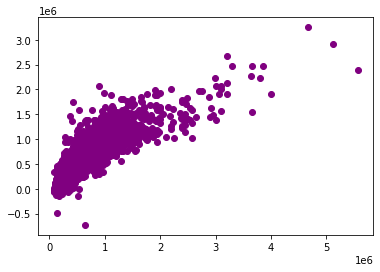

In [26]:
plt.scatter(Ytest3,pred3,color='purple')

plt.show()

In [27]:
rmseDict = {1:rmse,2:rmse2,3:rmse3}
r2dict = {1:round(r21*100,2),2:round(r22*100,2),3:round(r23*100,2)}
mapedict = {1:mape,2:mape2,3:mape3}


print("Best Model according to Root Mean Sqaured Error : ",list(rmseDict.keys())[list(rmseDict.values()).index(min(rmseDict.values()))])
print("Best Model according to RSqaured : ",list(r2dict.keys())[list(r2dict.values()).index(max(r2dict.values()))])
print("Best Model according to Mean percentage Error : ",list(mapedict.keys())[list(mapedict.values()).index(min(mapedict.values()))])


Best Model according to Root Mean Sqaured Error :  1
Best Model according to RSqaured :  1
Best Model according to Mean percentage Error :  1


Model one has the highest r sqaured value, minimun root mean squared value and min mean absolute percentage error.


In [28]:
vif_data = pd.DataFrame()
XVar =  data[['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade',
     'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15', 'conDate','totalsqft']]
vif_data["feature"] = XVar.columns
vif_data["VIF"] = [variance_inflation_factor(XVar.values, i) for i in range(len(XVar.columns))]
vif_data

,feature,VIF
0,bedrooms,2.333285e+01
1,bathrooms,2.792883e+01
2,floors,1.399050e+01
3,waterfront,1.210924e+00
4,view,1.518720e+00
5,condition,3.498008e+01
6,grade,1.452328e+02
7,yr_built,1.067772e+04
8,yr_renovated,1.198362e+00
9,zipcode,4.873113e+06


VIF for none of the parameters in the model one is more than 10 hence the colinearity among dependent variables are acceptable. There is no need to combine or drop features for this model.

In [29]:
Xtrain.shape

(14480, 16)

In [31]:
import statsmodels.api as sm
X2 = sm.add_constant(Xtrain)
modelsum = sm.OLS(Ytrain,X2).fit()
modelsum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2090.
Date:                Sat, 09 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:21:50   Log-Likelihood:            -1.9757e+05
No. Observations:               14480   AIC:                         3.952e+05
Df Residuals:                   14463   BIC:                         3.953e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.107e+07   8.54e+06     -7.151      0.000   -7.78e+07   -4.43e+07
x1          -4.26e+04   2445.161    -17.423      0.000   -4.74e+04   -3.78e+04
x2          3.917e+04   3982.809      9.834      0.000    3.14e+04     4.7e+04
x3          1.829e+04   3985.772      4.588      0.000    1.05e+04    2.61e+04
x4          6.182e+05   2.18e+04     28.320      0.000    5.75e+05    6.61e+05
x5          5.027e+04   2624.244     19.157      0.000    4.51e+04    5.54e+04
x6          2.525e+04   2904.032      8.694      0.000    1.96e+04    3.09e+04
x7          9.749e+04   2638.220     36.953      0.000    9.23e+04    1.03e+05
x8         -2669.9832     89.914    -29.695      0.000   -2846.227   -2493.739
x9            25.5842      4.548      5.625      0.000      16.669      34.500
x10         -614.7552     40.737    -15.091      0.000    -694.605    -534.906
x11         5.939e+05   1.32e+04     45.117      0.000    5.68e+05     6.2e+05
x12        -2.025e+05    1.6e+04    -12.666      0.000   -2.34e+05   -1.71e+05
x13           27.2885      4.169      6.546      0.000      19.118      35.459
x14           -0.2132      0.063     -3.406      0.001      -0.336      -0.091
x15            3.6209      0.384      9.423      0.000       2.868       4.374
x16           87.5306      2.064     42.412      0.000      83.485      91.576
==============================================================================
Omnibus:                    13076.572   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1655882.940
Skew:                           3.864   Prob(JB):                         0.00
Kurtosis:                      54.816   Cond. No.                     1.01e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value for all the variables are under 0.05 and are significant in this model also the F-statistic is larger than one that implies that model is good.

# Assignment Question Answer

# Ans 10 Option C

In [32]:
data.loc[data["waterfront"] == 1,["id"]].shape[0]

163

# Ans 11 Option B

In [33]:
data.loc[data["floors"] == 2,["id"]].shape[0]

8241

# Ans 12 Option A

In [34]:
data.loc[(data["yr_built"] < 1960) & (data["waterfront"] == 1),["id"]].shape[0]

80

# Ans 13 Option A

In [35]:
data.loc[data["bathrooms"] > 4,["price"]].max()

price    7700000
dtype: int64

# Ans 14 Option C

# Ans 15 Option A

# Ans 16 Option A

# Ans 17 Option A and D

# Ans 18 Option C


# Ans 19 Option A